### Claim:
April 4, 1991
N Engl J Med 1991; 324:998
DOI: 10.1056/NEJM199104043241418

### Data Sources

<strong>Death numbers</strong>
https://www.cdc.gov/nchs/nvss/mortality_tables.htm
 - United States from the year 1999 
 
<strong>Rates of handedness</strong>
 - Neuropsychologia. 1992 Jul;30(7):601-8. doi: 10.1016/0028-3932(92)90065-t.


<div style="border:2px solid black; padding:10px">
    
# <font color="blue">Objective: </font>Test claims made in article using bayesian statistics.

<strong>Specifically calculate the difference between these two values:</strong><br>
<center>
<img src="static/images/bayes_ave_equations.png">
</center>
</div>


<hr style="border-top: 2px solid black;">

# Import Dependencies

In [1]:
import pandas as pd
import numpy as np

# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Load Data

In [2]:
# load the data
file = "handedness/lefthanded_data.csv"
# Rename columns so they are meaningful
names = ['Age', 'Male_LH_Rate', 'Female_LH_Rate']
lefthanded_data = pd.read_csv(file, names=names, header=0)

<hr style="border-top: 2px solid black;">

# Inspect Data

In [3]:
lefthanded_data.head(2)

,Age,Male_LH_Rate,Female_LH_Rate
0,10,12.717558,12.198041
1,11,15.318830,11.144804


In [4]:
lefthanded_data.dtypes

Age                 int64
Male_LH_Rate      float64
Female_LH_Rate    float64
dtype: object

In [5]:
lefthanded_data.shape

(77, 3)

In [6]:
lefthanded_data.describe()

,Age,Male_LH_Rate,Female_LH_Rate
count,77.000000,77.000000,77.000000
mean,48.000000,11.549122,9.120522
std,22.371857,3.138912,2.505480
min,10.000000,4.885999,4.680948
25%,29.000000,8.562868,6.604398
50%,48.000000,12.717558,9.892073
75%,67.000000,14.209302,11.368353
max,86.000000,15.546784,12.872166


# Visualize data

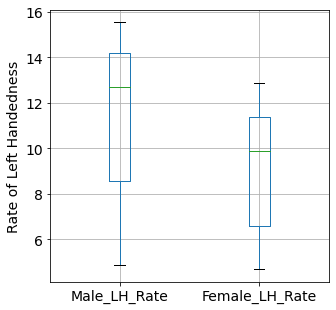

In [7]:
lefthanded_data.boxplot(column=['Male_LH_Rate', 'Female_LH_Rate'], by=None, ax=None, fontsize=14, rot=0, grid=True, figsize=(5,5))
plt.ylabel('Rate of Left Handedness')
plt.show()

<div style="border:1px solid black; padding:10px">
<font color="blue">Note:</font><br>
 - No missing data<br>
 - No need to change datatypes<br>
 - The rate of left handed female's in study appear lower than males.
</div>

<hr style="border-top: 3px solid black;">

# Compare male and female left-handedness rates vs. age

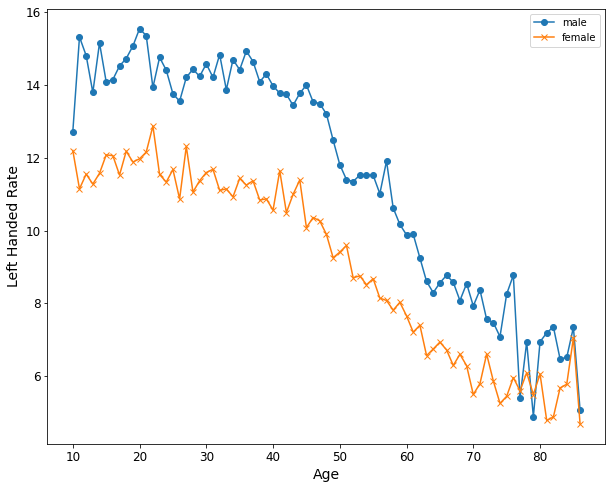

In [8]:
# Data to be plotted
male = lefthanded_data['Male_LH_Rate'].values
female = lefthanded_data['Female_LH_Rate'].values
age = lefthanded_data['Age'].values

# Code to generate figure
fig, ax = plt.subplots(figsize=(10,8)) # create figure and axis objects
ax.plot(age, male, marker = 'o', label='male') # plot "Female" vs. "Age"
ax.plot(age, female, marker = 'x', label='female') # plot "Male" vs. "Age"
ax.legend() # add a legend
ax.set_xlabel('Age')
ax.set_ylabel('Left Handed Rate')
plt.show()

<div style="border:1px solid black; padding:10px">
<font color="blue">Note:</font><br>

 - The rate of left handedness drops around age 30 for both males and females
 - The difference in the rate for left handedness between M and F seems to drop after age 70
 - Could be less men in sample after 70, as women generaly outlive men
</div>

<hr style="border-top: 3px solid black;">

# Rates of left-handedness over time

In [9]:
# Create a column that includes the birth year
# Year that the study was conducted
study_year = 1986
lefthanded_data['Birth_Year'] = study_year - lefthanded_data['Age']
# create a new column for the average of male and female
lefthanded_data['Mean_Rate_Left_Handed'] = lefthanded_data[['Male_LH_Rate', 'Female_LH_Rate']].mean(axis=1)

In [10]:
# Inspect new columns
lefthanded_data.head(3)

,Age,Male_LH_Rate,Female_LH_Rate,Birth_Year,Mean_Rate_Left_Handed
0,10,12.717558,12.198041,1976,12.457800
1,11,15.318830,11.144804,1975,13.231817
2,12,14.808281,11.549240,1974,13.178760


## Plot the rates of left-handedness over time

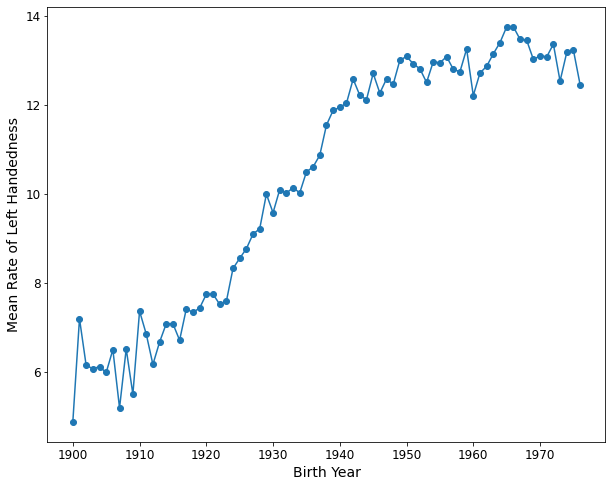

In [11]:
birth_year = lefthanded_data['Birth_Year'].values
mean_1h = lefthanded_data['Mean_Rate_Left_Handed'].values
# create a plot of the 'Mean_lh' column vs. 'Birth_year'
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(birth_year, mean_1h, marker = 'o') # plot 'Mean_lh' vs. 'Birth_year'
ax.set_xlabel('Birth Year') # set the x label for the plot
ax.set_ylabel('Mean Rate of Left Handedness') # set the y label for the plot
plt.show()

<div style="border:1px solid black; padding:10px">
<font color="blue">Note:</font><br>
    
 - The mean rate of individuals that are left handed increases between 1910 - 1950s
 - The mean rate of left handedness plateaus around 12-14%
</div>

<hr style="border-top: 3px solid black;">

# When do people normally die?

<p>
Since death is part of the probability we intend to estimate, we will need to get data that gives us:

 - The number of people that died in a given year
 - How old they were when they died
 
<strong>What we will calculate from this data</strong><br>

 - Distribution of ages at death
 - Normalize the numbers to the total number who dies to get a probability distribution of dying at a given age.
</p>

In [12]:
# Death distribution data for the United States in 1999
death_file = "handedness/death_data.csv"

# load death distribution data
death_distribution_data = pd.read_csv(death_file)

In [13]:
# Inspect data
death_distribution_data.head(3)

,Age_At_Death,Total_Deaths,Nbr_Male_Deaths,Nbr_Female_Deaths
0,0,27937.0,15646.0,12291.0
1,1,1989.0,1103.0,886.0
2,2,1376.0,797.0,579.0


In [14]:
death_distribution_data.describe()

,Age_At_Death,Total_Deaths,Nbr_Male_Deaths,Nbr_Female_Deaths
count,125.000000,120.000000,115.000000,120.000000
mean,62.000000,19925.358333,10218.982609,10132.166667
std,36.228442,23523.773527,11183.006921,13081.181052
min,0.000000,1.000000,1.000000,1.000000
25%,31.000000,1733.250000,1067.000000,816.250000
50%,62.000000,8933.500000,5401.000000,3708.500000
75%,93.000000,31112.500000,15576.000000,14745.500000
max,124.000000,73039.000000,36020.000000,42335.000000


<div style="border:1px solid black; padding:10px">
<font color="blue">Note:</font><br>
    
 - Will drop missing values
 - Missing values for number of male deaths
 - 62 is the mean age of death
</div>

In [15]:
# drop NaN values from the `Total_Deaths` column
death_distribution_data.dropna(subset=['Total_Deaths'], inplace=True)

# Visualize number of people that died by age

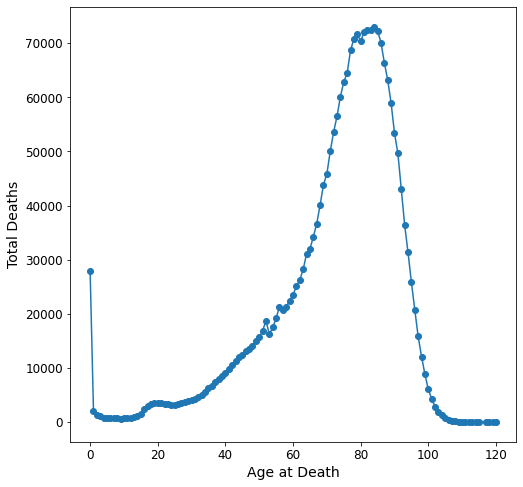

In [16]:
# plot number of people who died as a function of age
fig, ax = plt.subplots(figsize=(8,8))
ax.plot('Age_At_Death', 'Total_Deaths', data = death_distribution_data, marker='o') # plot 'Both Sexes' vs. 'Age'
ax.set_xlabel('Age at Death') 
ax.set_ylabel('Total Deaths')
plt.show()

<hr style="border-top: 2px solid black;">

# Applying Bayes' rule

<Strong>Why are we using Bayes' rule</Strong>

In this scenario we want to test the claims that left-handed people die earlier than right-handed people.

<p>
There are two scenarios:
<ol>
    <li>The probability of dying at a certain age given that you're left-handed</li>
    <li>The Probability of being left-handed given that you died at a certain age.</li>
<ol>
    
These probabilities are not equal, and a result, we can use Bayes' Rule to update our beliefs about these conditional probabilities.

# Building a model to test these probabilities

<p><strong>First, lets list the two events we care about: </strong>
<ul>
    <li>left-handedness (LH)</li>
    <li>dying at a given age (A)</li>
</ul>
</p>
<p>    
<strong>We can then construct conditional statements that we want to calculate:</strong>

 - <font color="red">The probability of dying at age A given that you're left-handed: <code>P(A | LH)</code></font>
 - The probability of dying at age A for right-handed people: <code>P(A | RH)</code>
 - The probability of being left-handed given that you died at a given age: <code>P(LH | A)</code>
 - The overall probability of dying at age A: <code>P(A)</code>
 - The overall probability of being left-handed: <code>P(LH)</code>
</p>

<p>
    <strong>Using the terms above, we can put this together into the following equation to calculate: </strong> 
<br><br><strong>The probability of dying at age A given that you're left-handed<code><font color="red">P(A | LH)</font></code>:</strong><br>
$$P(A | LH) = \frac{P(LH | A) P(A)}{P(LH)}$$
<p>


<p>
<strong>Special Consideration for calculating P(LH | A): </strong>    

 - <code>P(LH | A)</code> is the probability of being left-handed given that you died at a given age 
 - The calculation requires that we include ages that people died outside of the original data
 - Since we do not have this data, we will extrapolate
 - Why? because we can see that the rates appear flat in the early 1900s and late 1900s
</p>

<p>
<strong>Finally: </strong>   <br> 
    With this information we can then use the following formula to test the claims made:
<p>$$\text{Average age of left-handed people at death} = \sum_A A P(A | LH)$$</p>
<p>$$\text{Average age of right-handed people at death} = \sum_A A P(A | RH)$$</p>    
</p>
    
 

# Next Steps: Calculate each quantity in the equation

<p>
<ol>
    <li>Create a function to calculate <code>P(LH | A)</code>
    <li>Create a function to calculate <code>P(LH)</code> 
    <li>Create a function to calculate <code>P(A | LH)</code>
    <li>If you are wondering about <code>P(A)</code>, we already have this data, it is from the <code>death_distribution_data</code> we analyzed</li>
    <li>If you are wondering about <code>P(A | RH)</code>, this is just 1 - <code>P(A | LH)</code></li>    
</ol>        
</p>   

<hr style="border-top: 2px solid black;">

# Step 1: Create a function to calculate the probability of being left-handed given that you died at a given age P(LH | A).

<br>
<br>

<strong>Data needed</strong>
 - <code>lefthanded_data</code>
  - <code>Mean_Rate_Left_Handed</code>
  - <code>Birth_Year</code>
 - <code>death_distribution_data</code>
  - <code>ages_of_death</code>    

<strong>Goal</strong><br>
Create an <strong>array</strong> that contains the probability that a left handed person died at a specific age.
<br><br>
<strong>Process</strong>
<ol>
    <li>Segment the <code>lefthanded_data['Mean_Rate_Left_Handed']</code> series into 3 groups based on when they were born (1900 to 1976): <br>
        early_1900s_rate: 6.00<br>
        late_1900s_rate: 13.09<br>
        middle_rates: 4.87 - 13.75<br><br>
            <strong>Why segment</strong> the <code>lefthanded_data['Mean_Rate_Left_Handed']</code> series contains the rates that individuals with left handedness (mean) were born, we can use this information to determine, what proportion of these individuals may have died in that same period, by referencing our death data <code>death_distribution_data.ages_of_death</code></li><br>
<li>Asign the following variables to these ages:<br>
        <code>youngest_age</code>: 14<br>
        <code>oldest_age</code>: 90
</li><br>
    <li>Create an array with the same length of <code>death_distribution_data.Age_At_Death</code>, which is 120 elements. This will be used to contain the probabilities of death data, and will be generated using this following code:<br>
        <code>np.zeros(ages_of_death.shape)</code>
    </li>
   </ol> 

In [17]:
def P_dying_LH_given_A(ages_of_death, study_year = 1990):    
    # Left handed data
    # Create conditional age segments to be used in next code block
    early_1900s_rate = lefthanded_data['Mean_Rate_Left_Handed'].tail(10).mean()
    late_1900s_rate = lefthanded_data['Mean_Rate_Left_Handed'].head(10).mean()
    middle_rates = lefthanded_data.loc[lefthanded_data['Birth_Year'].isin(study_year - ages_of_death)]['Mean_Rate_Left_Handed']
    youngest_age = study_year - 1986 + 10 # the youngest age is 10
    oldest_age = study_year - 1986 + 86 # the oldest age is 86
    
    # Date: Death data and Left Handed data
    # This code will calculate to the rate of left handed people that died
    # in a given age segment from above
    # 1. create an empty array to store the results
    P_return = np.zeros(ages_of_death.shape) 
    # 2. the function will go through each age of death and will assign a value
    # from below to the P_return based on the age group    
    P_return[ages_of_death > oldest_age] = early_1900s_rate / 100
    P_return[ages_of_death < youngest_age] = late_1900s_rate / 100
    P_return[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rates / 100
    
    return P_return

# Output for each <code>P_return</code> in function

### Output for <code>P_return = np.zeros(death_distribution_data.Age_At_Death.shape)</code>

In [18]:
P_return = np.zeros(death_distribution_data.Age_At_Death.shape)
P_return

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

<div style="border:1px solid black; padding:10px">
<font color="blue">Note:</font><br>
    
 - This code creates an array with zeros that has the number of elements in <code>death_distribution_data.Age_At_Death.shape</code>
 - the <code>.shape</code> returns a tuple that provides the length of elements for the row, and columns. Since this is a 1D array, only the number of elements in the row was returned. Yu would get the same thing if you used.
</div>

## Output for each <code>P_return[death_distribution_data.Age_At_Death &#60; youngest_age] &#61; late_1900s_rate &#47; 100</code> in function

In [19]:
late_1900s_rate = lefthanded_data['Mean_Rate_Left_Handed'].head(10).mean()
youngest_age = study_year - 1986 + 10
study_year = 1990
P_return = np.zeros(death_distribution_data.Age_At_Death.shape) 
P_return[death_distribution_data.Age_At_Death < youngest_age] = late_1900s_rate / 100
P_return

array([0.13090615, 0.13090615, 0.13090615, 0.13090615, 0.13090615,
       0.13090615, 0.13090615, 0.13090615, 0.13090615, 0.13090615,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<div style="border:1px solid black; padding:10px">
<font color="blue">Note:</font><br>

<ol>
    <li>get the percent of left handedness in the most recent instances for left handedness dataset: <code>late_1900s_rate = lefthanded_data['Mean_Rate_Left_Handed'].head(10).mean()</code> = 13.096
    </li><br>
<li>Convert the lefthanded rate into a decimal by dividing by a 100, and add that value to all elements of the array whose age in the <code>death_distribution_data.Age_At_Death </code> array is less than the <code>youngest_age </code><br>
    This code will add the lefthandedness rate to that index <code>P_return &#91;death_distribution_data.Age_At_Death&lt; youngest_age &#93; = late_1900s_rate &#47;100</code>
</li><br>
    <li>The remaining elements are left at zero since their <code>death_distribution_data.Age_At_Death</code> value is greater than <code>youngest_age </code>
</ol>

</div>

## Output for each <code>P_return[np.logical_and((death_distribution_data.Age_At_Death &#60;&#61; oldest_age), (death_distribution_data.Age_At_Death &#62;&#61; youngest_age))] &#61; middle_rates &#47; 100</code> in function

In [20]:
youngest_age = study_year - 1986 + 10 # the youngest age is 10
oldest_age = study_year - 1986 + 86 # the oldest age is 86
ages_of_death = death_distribution_data.Age_At_Death
middle_rates = lefthanded_data.loc[lefthanded_data['Birth_Year'].isin(study_year - ages_of_death)]['Mean_Rate_Left_Handed']

In [21]:
print('The youngest age is: {}\nThe oldest age: {}'.format(youngest_age, oldest_age))

The youngest age is: 14
The oldest age: 90


In [22]:
P_return = np.zeros(death_distribution_data.Age_At_Death.shape) 
P_return[np.logical_and((death_distribution_data.Age_At_Death <= oldest_age), (death_distribution_data.Age_At_Death >= youngest_age))] = middle_rates / 100
P_return

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.124578  ,
       0.13231817, 0.1317876 , 0.12535093, 0.13364605, 0.13081958,
       0.13103212, 0.13023483, 0.13453279, 0.13476138, 0.13758695,
       0.13755217, 0.13401601, 0.13149261, 0.12868653, 0.12717081,
       0.12210316, 0.13257706, 0.12744987, 0.12802655, 0.13086048,
       0.12945637, 0.12969764, 0.125059  , 0.12811728, 0.12925186,
       0.13089713, 0.13005413, 0.12463253, 0.12584601, 0.12266167,
       0.12708746, 0.12119368, 0.12214977, 0.12579418, 0.12039146,
       0.11946389, 0.11876431, 0.11545791, 0.10867741, 0.10607883,
       0.10492997, 0.100238  , 0.10137892, 0.10019225, 0.10095186,
       0.09576935, 0.0999348 , 0.09214568, 0.09096888, 0.08766035,
       0.08550735, 0.08322044, 0.07580706, 0.07517361, 0.07748125,
       0.0774286 , 0.07433365, 0.07336605, 0.0741282 , 0.06709

<div style="border:1px solid black; padding:10px">
<font color="blue">Note:</font><br>

<ol>
    <li>Get median rate of left handed individuals born between <strong>1976</strong> and <strong>1990</strong> using this code:
        <code>middle_rates = lefthanded_data.loc[lefthanded_data['Birth_Year'].isin(study_year - ages_of_death)]['Mean_Rate_Left_Handed']</code>
    </li>  <br>      
    <li>Convert the these values into a decimal by dividing by 100
    </li><br>
<li>Then add these rates into the array we created for people that died between the ages of <strong>14</strong> and <strong>90</strong>. That is what this code does:<br>
    <code>P_return[np.logical_and((death_distribution_data.Age_At_Death &#60;&#61; oldest_age), (death_distribution_data.Age_At_Death &#62;&#61; youngest_age))] &#61; middle_rates &#47; 100</code>
</li><br>
</ol>

</div>

In [23]:
early_1900s_rate = lefthanded_data['Mean_Rate_Left_Handed'].tail(10).mean()
P_return = np.zeros(death_distribution_data.Age_At_Death.shape) 
P_return[death_distribution_data.Age_At_Death > oldest_age] = early_1900s_rate / 100
P_return

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<div style="border:1px solid black; padding:10px">
<font color="blue">Note:</font><br>

<ol>
    <li>This code does the same type of operation, it gets the percent of individuals that were left handed in the early 1900s, and converts it into a decimal.<br>
        <code>early_1900s_rate &#47; 100</code>
    </li> <br>      
    <li>It then stores this rate into all indexes of the array where the age of death is greater than 90<br>
        <code>death_distribution_data.Age_At_Death > oldest_age</code>
</li>
</ol>

</div>

## Visualize the probability of being left handed and dying at a given age

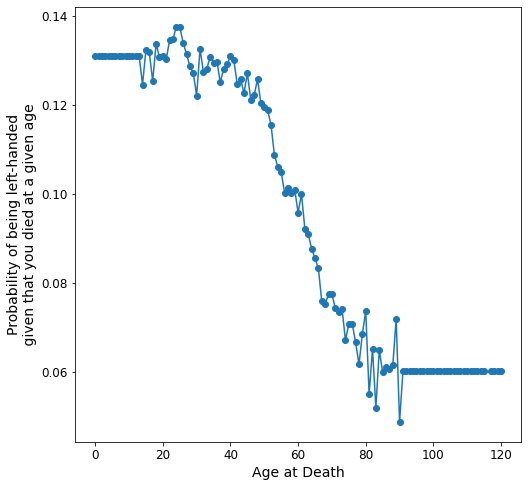

In [24]:
# plot the probability of being left handed and dying at a given age
data = P_dying_LH_given_A(death_distribution_data.Age_At_Death, study_year = 1990)
data_dict = {"Prob_Dying_LH_Age" : data, 'Age': death_distribution_data.Age_At_Death}
data_df = pd.DataFrame(data_dict)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot('Age', 'Prob_Dying_LH_Age', data = data_df, marker='o') # plot 'Both Sexes' vs. 'Age'
ax.set_xlabel('Age at Death') 
ax.set_ylabel('Probability of being left-handed\n given that you died at a given age ')
plt.show()

<hr style="border-top: 2px solid black;">

# Step 2: Create a function to Calculate the overall probability of left-handedness

 - P(LH) is the probability that a person who died in our particular study year is left-handed
 - This is the average left-handedness in the population of deceased people, and we can calculate it by summing up all of the left-handedness probabilities for each age, weighted with the number of deceased people at each age
 - Then divided by the total number of deceased people to get a probability
 
 In equation form, this is what we're calculating, where N(A) is the number of people who died at age A (given by the dataframe <code>death_distribution_data</code>):</p>
<p><img src="https://i.imgur.com/gBIWykY.png" alt="equation" width="220"></p>
<!--- $$P(LH) = \frac{\sum_{\text{A}} P(LH | A) N(A)}{\sum_{\text{A}} N(A)}$$ --> 

In [25]:
def P_Left_Handed(death_distribution_data, study_year = 1990):
    p_list = death_distribution_data['Total_Deaths']*P_dying_LH_given_A(death_distribution_data['Age_At_Death'], study_year)
    p = np.sum(p_list)
    return p/np.sum(death_distribution_data['Total_Deaths'])

<strong>Goal</strong><br>
Calculate the overall probability of being left-handed if you died in the study year.
<br><br>
<strong>Process</strong>
<ol>
    <li><code>p_list</code> this code will get the total number of left handed people that died for each age (0 - 120) in this study, and save it in an array<br>
        <em>How?</em><br>
        For each age, multiple the total number of deaths from this array <code>death_distribution_data['Total_Deaths']</code> to the array that has the same number of elements, and contains the probability (ratio) of peole that were left handed that died at the given age.<br>
        <em>Example</em> total number of people that died at age zero times all the left handed people that died at age zero. This value is then stored in an array, and the calculation is carried out for each age until you finish age 120.
</li><br>
    <li>Sum up all the left handed people that died between the age of 0 - 120 using np.sum()<br>
        <code>p = np.sum(p_list)</code>
</li><br>
    <li>Divide the total number of left handed people that died by all the people that died in the same time period<br>
        <code>p/np.sum(death_distribution_data['Total_Deaths'])</code><br>
        This will return a single value, and represents the 'Overall probability of being left-handed if you died in the study year.
    </li>
    </ol>

### Process Step 1: Get an array that contains the total number of left handed people that died for ages 0 - 120

In [26]:
# REMINDER what death_distribution_data['Total_Deaths'] returns (a series)
# Total death gives us the total number of people that died at a given age
# The range of ages are 0 - 120. This includes left handed and right handed people.
death_distribution_data['Total_Deaths']

0      27937.0
1       1989.0
2       1376.0
3       1046.0
4        838.0
        ...   
115        3.0
117        3.0
118        1.0
119        2.0
120        1.0
Name: Total_Deaths, Length: 120, dtype: float64

In [27]:
# Gives us all the probabilities of a left handed person dying 
# at every given age between 0 - 120
P_dying_LH_given_A(death_distribution_data['Age_At_Death'], study_year)

array([0.13090615, 0.13090615, 0.13090615, 0.13090615, 0.13090615,
       0.13090615, 0.13090615, 0.13090615, 0.13090615, 0.13090615,
       0.13090615, 0.13090615, 0.13090615, 0.13090615, 0.124578  ,
       0.13231817, 0.1317876 , 0.12535093, 0.13364605, 0.13081958,
       0.13103212, 0.13023483, 0.13453279, 0.13476138, 0.13758695,
       0.13755217, 0.13401601, 0.13149261, 0.12868653, 0.12717081,
       0.12210316, 0.13257706, 0.12744987, 0.12802655, 0.13086048,
       0.12945637, 0.12969764, 0.125059  , 0.12811728, 0.12925186,
       0.13089713, 0.13005413, 0.12463253, 0.12584601, 0.12266167,
       0.12708746, 0.12119368, 0.12214977, 0.12579418, 0.12039146,
       0.11946389, 0.11876431, 0.11545791, 0.10867741, 0.10607883,
       0.10492997, 0.100238  , 0.10137892, 0.10019225, 0.10095186,
       0.09576935, 0.0999348 , 0.09214568, 0.09096888, 0.08766035,
       0.08550735, 0.08322044, 0.07580706, 0.07517361, 0.07748125,
       0.0774286 , 0.07433365, 0.07336605, 0.0741282 , 0.06709

In [28]:
# Multiply the total number of people that died at each each between 0 - 120  
# by the probability that that person that died was left handed
# p_list in this example is the total number of people that 
p_list = death_distribution_data['Total_Deaths']*P_dying_LH_given_A(death_distribution_data['Age_At_Death'], study_year)
p_list

0      3657.124980
1       260.372323
2       180.126856
3       136.927828
4       109.699350
          ...     
115       0.180215
117       0.180215
118       0.060072
119       0.120143
120       0.060072
Name: Total_Deaths, Length: 120, dtype: float64

## Visualize the Number of left handed people that died at a given age from <code>p_list</code>

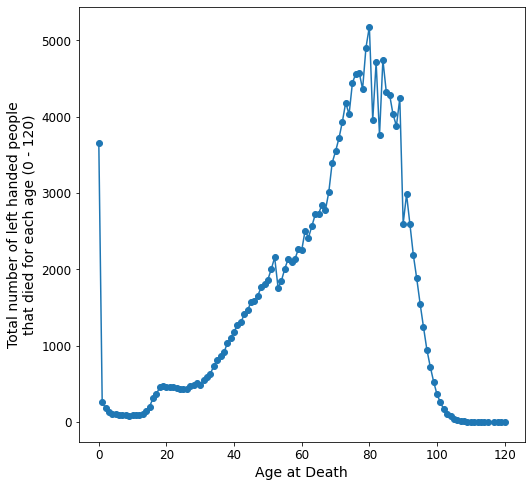

In [29]:
p_list_dict = {"Total_LH_Death_Age" : p_list, 'Age': death_distribution_data.Age_At_Death}
data_df = pd.DataFrame(p_list_dict)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot('Age', 'Total_LH_Death_Age', data = data_df, marker='o') # plot 'Both Sexes' vs. 'Age'
ax.set_xlabel('Age at Death') 
ax.set_ylabel('Total number of left handed people\nthat died for each age (0 - 120)')
plt.show()

### Process Step 2: Sum up all the number of left handed people that died in this period

In [30]:
# Sum up the total number of left handed people that died of 0 - 120
p = np.sum(p_list)
p

185697.66742970835

In [31]:
# To total number of deaths in the death_distribution_data dataset
total_deaths = np.sum(death_distribution_data['Total_Deaths'])
total_deaths

2391043.0

### Process Step 3: Return the overall probability of being left-handed if you died in the study year

In [32]:
# Finally, get the ratio of left handed people that died from everyone that died
# Divide all the left handed people that died the total number of people that died
print_return = p/np.sum(death_distribution_data['Total_Deaths'])
print_return

0.07766387615350638

# Evoke the function to Calculate the overall probability of left-handedness

In [33]:
# Calculate the probability of left handedness
print('The overall probability of left-handedness is: {}'.format(np.around(P_Left_Handed(death_distribution_data, study_year = 1990),4)))

The overall probability of left-handedness is: 0.0777


<hr style="border-top: 4px solid black;">

# Create a Function to Calculate the Probability of Dying while Left-Handed <code>P (A | LH)</code> and Right-Handed <code>P (A | RH)</code>

<ul>What we have so far:
    <li>P(A)</li>
        <li>P(LH)</li>
        <li>P(A)</li>
    <li>P(LH | A)</li>
</ul>

<p><strong>Next Steps</strong><br>
Use Bayes' rule to get the probability of being age A at death (in the study year) given that you're:
    <ul>
        <li><code>P(A | LH)</code> left-handed</li>
        <li><code>P(A | RH)</code>right-handed</li>  
</ul>        
</p>

## Probability of being age A at death (in the study year) given that you're P(A | LH) left-handed

<p>$$P(A | LH) = \frac{P(LH|A) P(A)}{P(LH)}$$</p>

In [34]:
def Prob_Age_given_lh(ages_of_death, death_distribution_data, study_year = 1990):
    Prob_Age = death_distribution_data['Total_Deaths'][ages_of_death] / np.sum(death_distribution_data['Total_Deaths'])
    # use P_lh function to get probability of left-handedness overall
    P_left = P_Left_Handed(death_distribution_data)
    # use P_lh_given_A to get probability of left-handedness for a certain age
    P_lh_A = P_dying_LH_given_A(death_distribution_data['Age_At_Death'][ages_of_death],study_year)
    return P_lh_A*Prob_Age/P_left

<strong>Goal</strong><br>
Calculate the probability of being age A at death (in the study year) given that you're either left handed.
<br><br>
<strong>Process</strong>
<ol>
    <li><code>Prob_Age = death_distribution_data['Total_Deaths'][ages_of_death] / np.sum(death_distribution_data['Total_Deaths'])</code> this code will return an array of probabilities (the proportion) or people that died at each age from 0 - 120.<br>
</li><br>
    <li>Evoke the function that calculates the probability that a person who died in our particular study year is left-handed <br>
        <code>P_left = P_Left_Handed(death_distribution_data)</code>
</li><br>
    <li>Evoke the function that calculates the probability that a left handed person died at a specific age.<br>
        <code>P_lh_A = P_dying_LH_given_A(death_distribution_data['Age_At_Death'],study_year)</code><br>
    </li>
    <li>Multiply the probability of dying at a given age by the probability of being left-handed at a given age<br>
        <code>P_lh_A*Prob_Age</code>
    </li>
    <li>Finally, divide the previous calculation by the probability of being left handed, and return this value</li>
    </ol>

## Process Step 1: <br><br><strong><font color="red">Code:</font></strong><code>Prob_Age = death_distribution_data['Total_Deaths'][ages_of_death] / np.sum(death_distribution_data['Total_Deaths'])</code><br><br><strong><font color="red">What it does</font></strong>: returns an array that contains the total number of people that died for each age between 0 - 120

In [35]:
# This code will return an array that contains the ages between 0 - 120
ages_of_death = death_distribution_data.Age_At_Death
ages_of_death

0        0
1        1
2        2
3        3
4        4
      ... 
115    115
117    117
118    118
119    119
120    120
Name: Age_At_Death, Length: 120, dtype: int64

In [36]:
# This code will then return the total deaths for each age and stores it into an array named ages_of_death
death_distribution_data['Total_Deaths'][ages_of_death]

0      27937.0
1       1989.0
2       1376.0
3       1046.0
4        838.0
        ...   
115        3.0
117        3.0
118        1.0
119        2.0
120        1.0
Name: Total_Deaths, Length: 120, dtype: float64

In [37]:
# This code sums up all the deaths
print('The total number of deaths in this dataset is: {}'.format(np.sum(death_distribution_data['Total_Deaths'])))

The total number of deaths in this dataset is: 2391043.0


In [38]:
# This code will divide the total number of deaths at each age, by the total number of people that died in the dataset, 
# and save the ratio into the array `Prob_Age`
ages_of_death = death_distribution_data.Age_At_Death
Prob_Age = death_distribution_data['Total_Deaths'][ages_of_death] / np.sum(death_distribution_data['Total_Deaths'])
Prob_Age

0      1.168402e-02
1      8.318546e-04
2      5.754811e-04
3      4.374660e-04
4      3.504747e-04
           ...     
115    1.254683e-06
117    1.254683e-06
118    4.182275e-07
119    8.364551e-07
120    4.182275e-07
Name: Total_Deaths, Length: 120, dtype: float64

## Visualize the probability of dying at given age from <code>Prob_Age</code>

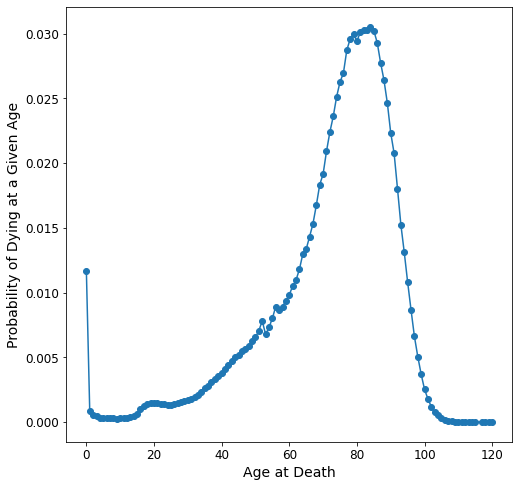

In [39]:
Prob_Age_dict = {"Prob_dying_by_age" : Prob_Age, 'Age': death_distribution_data.Age_At_Death}
fig, ax = plt.subplots(figsize=(8,8))
ax.plot('Age', 'Prob_dying_by_age', data = Prob_Age_dict, marker='o') # plot 'Both Sexes' vs. 'Age'
ax.set_xlabel('Age at Death') 
ax.set_ylabel('Probability of Dying at a Given Age')
plt.show()

## Process Step 2: <br><br><strong><font color="red">Code:</font></strong><code>P_left = P_Left_Handed(death_distribution_data)</code><br><br><strong><font color="red">What it does</font></strong>: calculates the probability that a person who died in our particular study year is left-handed.

In [40]:
P_left = P_Left_Handed(death_distribution_data, study_year = 1990)
P_left

0.07766387615350638

## Process Step 3: <br><br><strong><font color="red">Code:</font></strong><code>P_lh_A = P_dying_LH_given_A(death_distribution_data['Age_At_Death'][ages_of_death],study_year)</code><br><br><strong><font color="red">What it does</font></strong>: calculates the probability that a left handed person died at a specific age.

In [41]:
ages_of_death = death_distribution_data.Age_At_Death
P_lh_A = P_dying_LH_given_A(death_distribution_data['Age_At_Death'][ages_of_death],study_year)
P_lh_A

array([0.13090615, 0.13090615, 0.13090615, 0.13090615, 0.13090615,
       0.13090615, 0.13090615, 0.13090615, 0.13090615, 0.13090615,
       0.13090615, 0.13090615, 0.13090615, 0.13090615, 0.124578  ,
       0.13231817, 0.1317876 , 0.12535093, 0.13364605, 0.13081958,
       0.13103212, 0.13023483, 0.13453279, 0.13476138, 0.13758695,
       0.13755217, 0.13401601, 0.13149261, 0.12868653, 0.12717081,
       0.12210316, 0.13257706, 0.12744987, 0.12802655, 0.13086048,
       0.12945637, 0.12969764, 0.125059  , 0.12811728, 0.12925186,
       0.13089713, 0.13005413, 0.12463253, 0.12584601, 0.12266167,
       0.12708746, 0.12119368, 0.12214977, 0.12579418, 0.12039146,
       0.11946389, 0.11876431, 0.11545791, 0.10867741, 0.10607883,
       0.10492997, 0.100238  , 0.10137892, 0.10019225, 0.10095186,
       0.09576935, 0.0999348 , 0.09214568, 0.09096888, 0.08766035,
       0.08550735, 0.08322044, 0.07580706, 0.07517361, 0.07748125,
       0.0774286 , 0.07433365, 0.07336605, 0.0741282 , 0.06709

## Process Step 4: <br><br><strong><font color="red">Code:</font></strong><code>P_lh_A*Prob_Age</code><br><br><strong><font color="red">What it does</font></strong>: multiply the probability that a left handed person died at a specific age, by the probability of dying at a given age

In [42]:
P_lh_A*Prob_Age/P_left

0      1.969397e-02
1      1.402130e-03
2      9.700006e-04
3      7.373697e-04
4      5.907417e-04
           ...     
115    9.704740e-07
117    9.704740e-07
118    3.234913e-07
119    6.469827e-07
120    3.234913e-07
Name: Total_Deaths, Length: 120, dtype: float64

## Process Step 5: <br><br><strong><font color="red">Code:</font></strong><code>P_lh_A*Prob_Age/P_left</code><br><br><strong><font color="red">What it does</font></strong>: divide each instance by the probability of being left handed

In [43]:
P_lh_A*Prob_Age/P_left

0      1.969397e-02
1      1.402130e-03
2      9.700006e-04
3      7.373697e-04
4      5.907417e-04
           ...     
115    9.704740e-07
117    9.704740e-07
118    3.234913e-07
119    6.469827e-07
120    3.234913e-07
Name: Total_Deaths, Length: 120, dtype: float64

## <font color="red">Putting it all together</font> to calculate the probability of being age A at death (in the study year) given that you're  <font color="red">left handed</font>.

In [44]:
ages_of_death = death_distribution_data.Age_At_Death
Prob_Age_given_lh(ages_of_death, death_distribution_data, study_year = 1990)

0      1.969397e-02
1      1.402130e-03
2      9.700006e-04
3      7.373697e-04
4      5.907417e-04
           ...     
115    9.704740e-07
117    9.704740e-07
118    3.234913e-07
119    6.469827e-07
120    3.234913e-07
Name: Total_Deaths, Length: 120, dtype: float64

<div style="border:1px solid black; padding:10px">
<font color="blue">Note:</font><br>

This function will return an array with 120 elements, each element represents an age, and the probability of
being age A (0 - 120) at death (in the study year) given that you're left handed.
</div>

<hr style="border-top: 3px solid black;">

## Probability of being age A at death (in the study year) given that you're P(A | RH) right-handed

In [45]:
def Prob_Age_given_rh(ages_of_death, death_distribution_data, study_year = 1990):
    P_A = death_distribution_data['Total_Deaths'][ages_of_death] / np.sum(death_distribution_data['Total_Deaths'])
    P_right = 1 - P_Left_Handed(death_distribution_data)
    P_rh_A = 1 - P_dying_LH_given_A(death_distribution_data['Age_At_Death'][ages_of_death],study_year)
    return P_rh_A*P_A/P_right

<strong>Goal</strong><br>
Calculate the probability of being age A at death (in the study year) given that you're either right handed.
<br><br>
<strong>Process</strong> will be same as for the function that calculates left handed, although
<ol>
    <li><code>P_right = 1 - P_Left_Handed(death_distribution_data)</code> this code will just get the right handed data by subtracting the left handed data by 1.<br>
</li><br>
    <li>Calculates the probability that a person who died in our particular study year is right-handed by subtracting the left handed data by 1<br>
        <code>P_rh_A = 1 - P_dying_LH_given_A(death_distribution_data['Age_At_Death'][ages_of_death],study_year)</code>
    </ol>

In [46]:
# right handed death probability
P_right = 1- P_Left_Handed(death_distribution_data)
print('The probability of dying in this study as right handed is: {}'.format(P_right))

The probability of dying in this study as right handed is: 0.9223361238464937


In [47]:
P_rh_A = 1 - P_dying_LH_given_A(death_distribution_data['Age_At_Death'],study_year)
print('The probability of a right handed person dying at a given age is: {}'.format(P_rh_A))

The probability of a right handed person dying at a given age is: [0.86909385 0.86909385 0.86909385 0.86909385 0.86909385 0.86909385
 0.86909385 0.86909385 0.86909385 0.86909385 0.86909385 0.86909385
 0.86909385 0.86909385 0.875422   0.86768183 0.8682124  0.87464907
 0.86635395 0.86918042 0.86896788 0.86976517 0.86546721 0.86523862
 0.86241305 0.86244783 0.86598399 0.86850739 0.87131347 0.87282919
 0.87789684 0.86742294 0.87255013 0.87197345 0.86913952 0.87054363
 0.87030236 0.874941   0.87188272 0.87074814 0.86910287 0.86994587
 0.87536747 0.87415399 0.87733833 0.87291254 0.87880632 0.87785023
 0.87420582 0.87960854 0.88053611 0.88123569 0.88454209 0.89132259
 0.89392117 0.89507003 0.899762   0.89862108 0.89980775 0.89904814
 0.90423065 0.9000652  0.90785432 0.90903112 0.91233965 0.91449265
 0.91677956 0.92419294 0.92482639 0.92251875 0.9225714  0.92566635
 0.92663395 0.9258718  0.93290084 0.92920761 0.92918278 0.93332216
 0.93834863 0.93151539 0.92635764 0.9450466  0.93485719 0.94811

## <font color="red">Putting it all together</font> to calculate the probability of being age A at death (in the study year) given that you're <font color="red">right handed</font>.

In [48]:
ages_of_death = death_distribution_data.Age_At_Death
Prob_Age_given_rh(ages_of_death, death_distribution_data, study_year = 1990)

0      1.100956e-02
1      7.838354e-04
2      5.422612e-04
3      4.122131e-04
4      3.302434e-04
           ...     
115    1.278614e-06
117    1.278614e-06
118    4.262046e-07
119    8.524093e-07
120    4.262046e-07
Name: Total_Deaths, Length: 120, dtype: float64

<hr style="border-top: 3px solid black;">

# Plotting the Distributions of Conditional Probabilities

<p>Now that we have functions to calculate the probability of being age A at death given that you're left-handed or right-handed, let's plot these probabilities for a range of ages of death from 6 to 120. </p>

<p>Notice that the left-handed distribution has a bump below age 70: of the pool of deceased people, left-handed people are more likely to be younger. </p>

In [49]:
# Ages at death
ages_of_death = death_distribution_data.Age_At_Death
# calculate the probability of being left- or right-handed for each 
left_handed_probability = Prob_Age_given_lh(ages_of_death, death_distribution_data, study_year = 1990)
right_handed_probability = Prob_Age_given_rh(ages_of_death, death_distribution_data, study_year = 1990)

Text(0, 0.5, 'Probability of being age A at death')

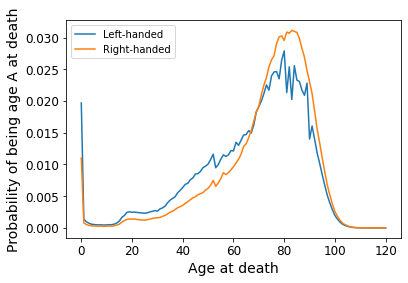

In [50]:
# create a plot of the two probabilities vs. age
fig, ax = plt.subplots() # create figure and axis objects
ax.plot(ages_of_death, left_handed_probability, label = "Left-handed")
ax.plot(ages_of_death, right_handed_probability, label = "Right-handed")
# ax.plot(left_handed_probability, right_handed_probability, label = 'Probabilities')
ax.legend() # add a legend
ax.set_xlabel("Age at death")
ax.set_ylabel(r"Probability of being age A at death")

<hr style="border-top: 3px solid black;">

# <font color="red">Final Test:</font> Age of left and right-handers at death

<p>
    <strong>Goal:</strong><br>
    Compare these results with the results from the original study.<br>
    Original study suggest that left-handed people were nine years younger at death on average.<br>
    <br>
    <strong>Process:</strong><br>
    <ol>
        <li>Calculate the mean of these probability distributions</li>
        <li>Weight the probability distribution by age</li>
        <li>Summing over the result</li>        
    </ol>
</p>

<center>
<img src="static/images/bayes_ave_equations.png">
</center>

In [51]:
# calculate average ages for left-handed and right-handed groups
# use np.array so that two arrays can be multiplied
average_lh_age =  np.round(np.nansum(ages_of_death*np.array(left_handed_probability)),2)
average_rh_age =  np.round(np.nansum(ages_of_death*np.array(right_handed_probability)),2)

# print the average ages for each group
print('The average age for left-handers is :{}\nThe average age for right-handers is: {}'.format(average_lh_age, average_rh_age))

# print the difference between the average ages
print("The difference in average ages is " + str(round(average_rh_age - average_lh_age, 1)) + " years.")

The average age for left-handers is :67.26
The average age for right-handers is: 72.8
The difference in average ages is 5.5 years.


<div style="border:1px solid black; padding:10px">
<font color="blue">Note:</font><br>

 - There is an age gap between left-handed and right-handed people.
 - Reported rates of left-handedness were ~3-6% in the early 1900s and then increased to 10-13% in the late 1990s.
 - Right handed inviduals outnumber left handed individuals at a majority of ages, including older people in study.
 - Left-handed study was suggest that the US death data will have more right-handed deaths.
 - The numbers in this study are less than the study published, this may be due to the death data taking the entire US population into account, rather than just California.
 - Extrapolations used on younger and older age groups may not reflect the actual rates in those ages.
</div>